- [x] Independently implement the function **gradient_descent(X, y)**, which trains a linear regression model for a given training sample, optimizing the functional using the gradient descent method (Batch Gradient Descent, GD) and returning the weight vector **w**. As a functional, one can choose, for example, the error function **MSE** + $L_2$-regulator. Use matrix-vector operations to calculate the gradient.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_error(x, y, w):
    return np.sum(((x @ w - y) ** 2), axis=0) / x.shape[0]

In [3]:
def get_gradient(x, y, w):
    return (2 / x.shape[0]) * (x.T @ (x @ w - y))

In [4]:
def gradient_descent(x, y, alpha=0.001, ep=0.0001, max_iter=1500, err_tol=0.01):
    n = x.shape[1]
    m = x.shape[0]

    w = np.zeros((n + 1, 1))
    x = np.append(np.ones((m, 1)), x, axis=1)

    converged = False
    i = 0
    J = get_error(x, y, w)

    print("\n---Gradient descent started")
    print("\nFirst weights: w = " + str(w))
    print("\nFirst error value: J =", J)

    while not converged:
        w = w - alpha * get_gradient(x, y, w)
        e = get_error(x, y, w)

        if abs(J - e) < err_tol:
            print("\n---Gradient descent stopped: Too little difference in error!")
            converged = True

        i += 1
        J = e

        if i == max_iter:
            print("\n---Gradient descent stopped: Max interactions exceeded!")
            converged = True

    print("\nIteration count: i =", i)
    print("\nLast error value: J =", J)
    print("\nLast weights: w = " + str(w))
    print("\n")

    return w

In [5]:
df_0 = pd.read_csv("data/test_2d.txt", names=["x", "y"])
x = np.array([df_0["x"]]).T
y = np.array([df_0["y"]]).T

w = gradient_descent(x, y)


---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [64.14546775]

---Gradient descent stopped: Too little difference in error!

Iteration count: i = 23

Last error value: J = [11.79777579]

Last weights: w = [[0.04561703]
 [0.78421312]]




- [x] Find data on which it will be interesting to solve the regression problem. The dependence of the target feature on the non-target ones should not be too complicated so that the trained linear model can show an acceptable result. As a last resort, take data to predict the cost of cars [here](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price) (target feature for prediction --- **price** ).
- [x] Read data, perform initial data analysis, perform Data Cleaning if necessary.
- [x] (+1 point) Before training models, select the best number (and the subset itself) of features, for example, using Recursive Feature Elimination (RFE).

In [6]:
df = pd.read_csv('data/car_sales.csv')

In [7]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


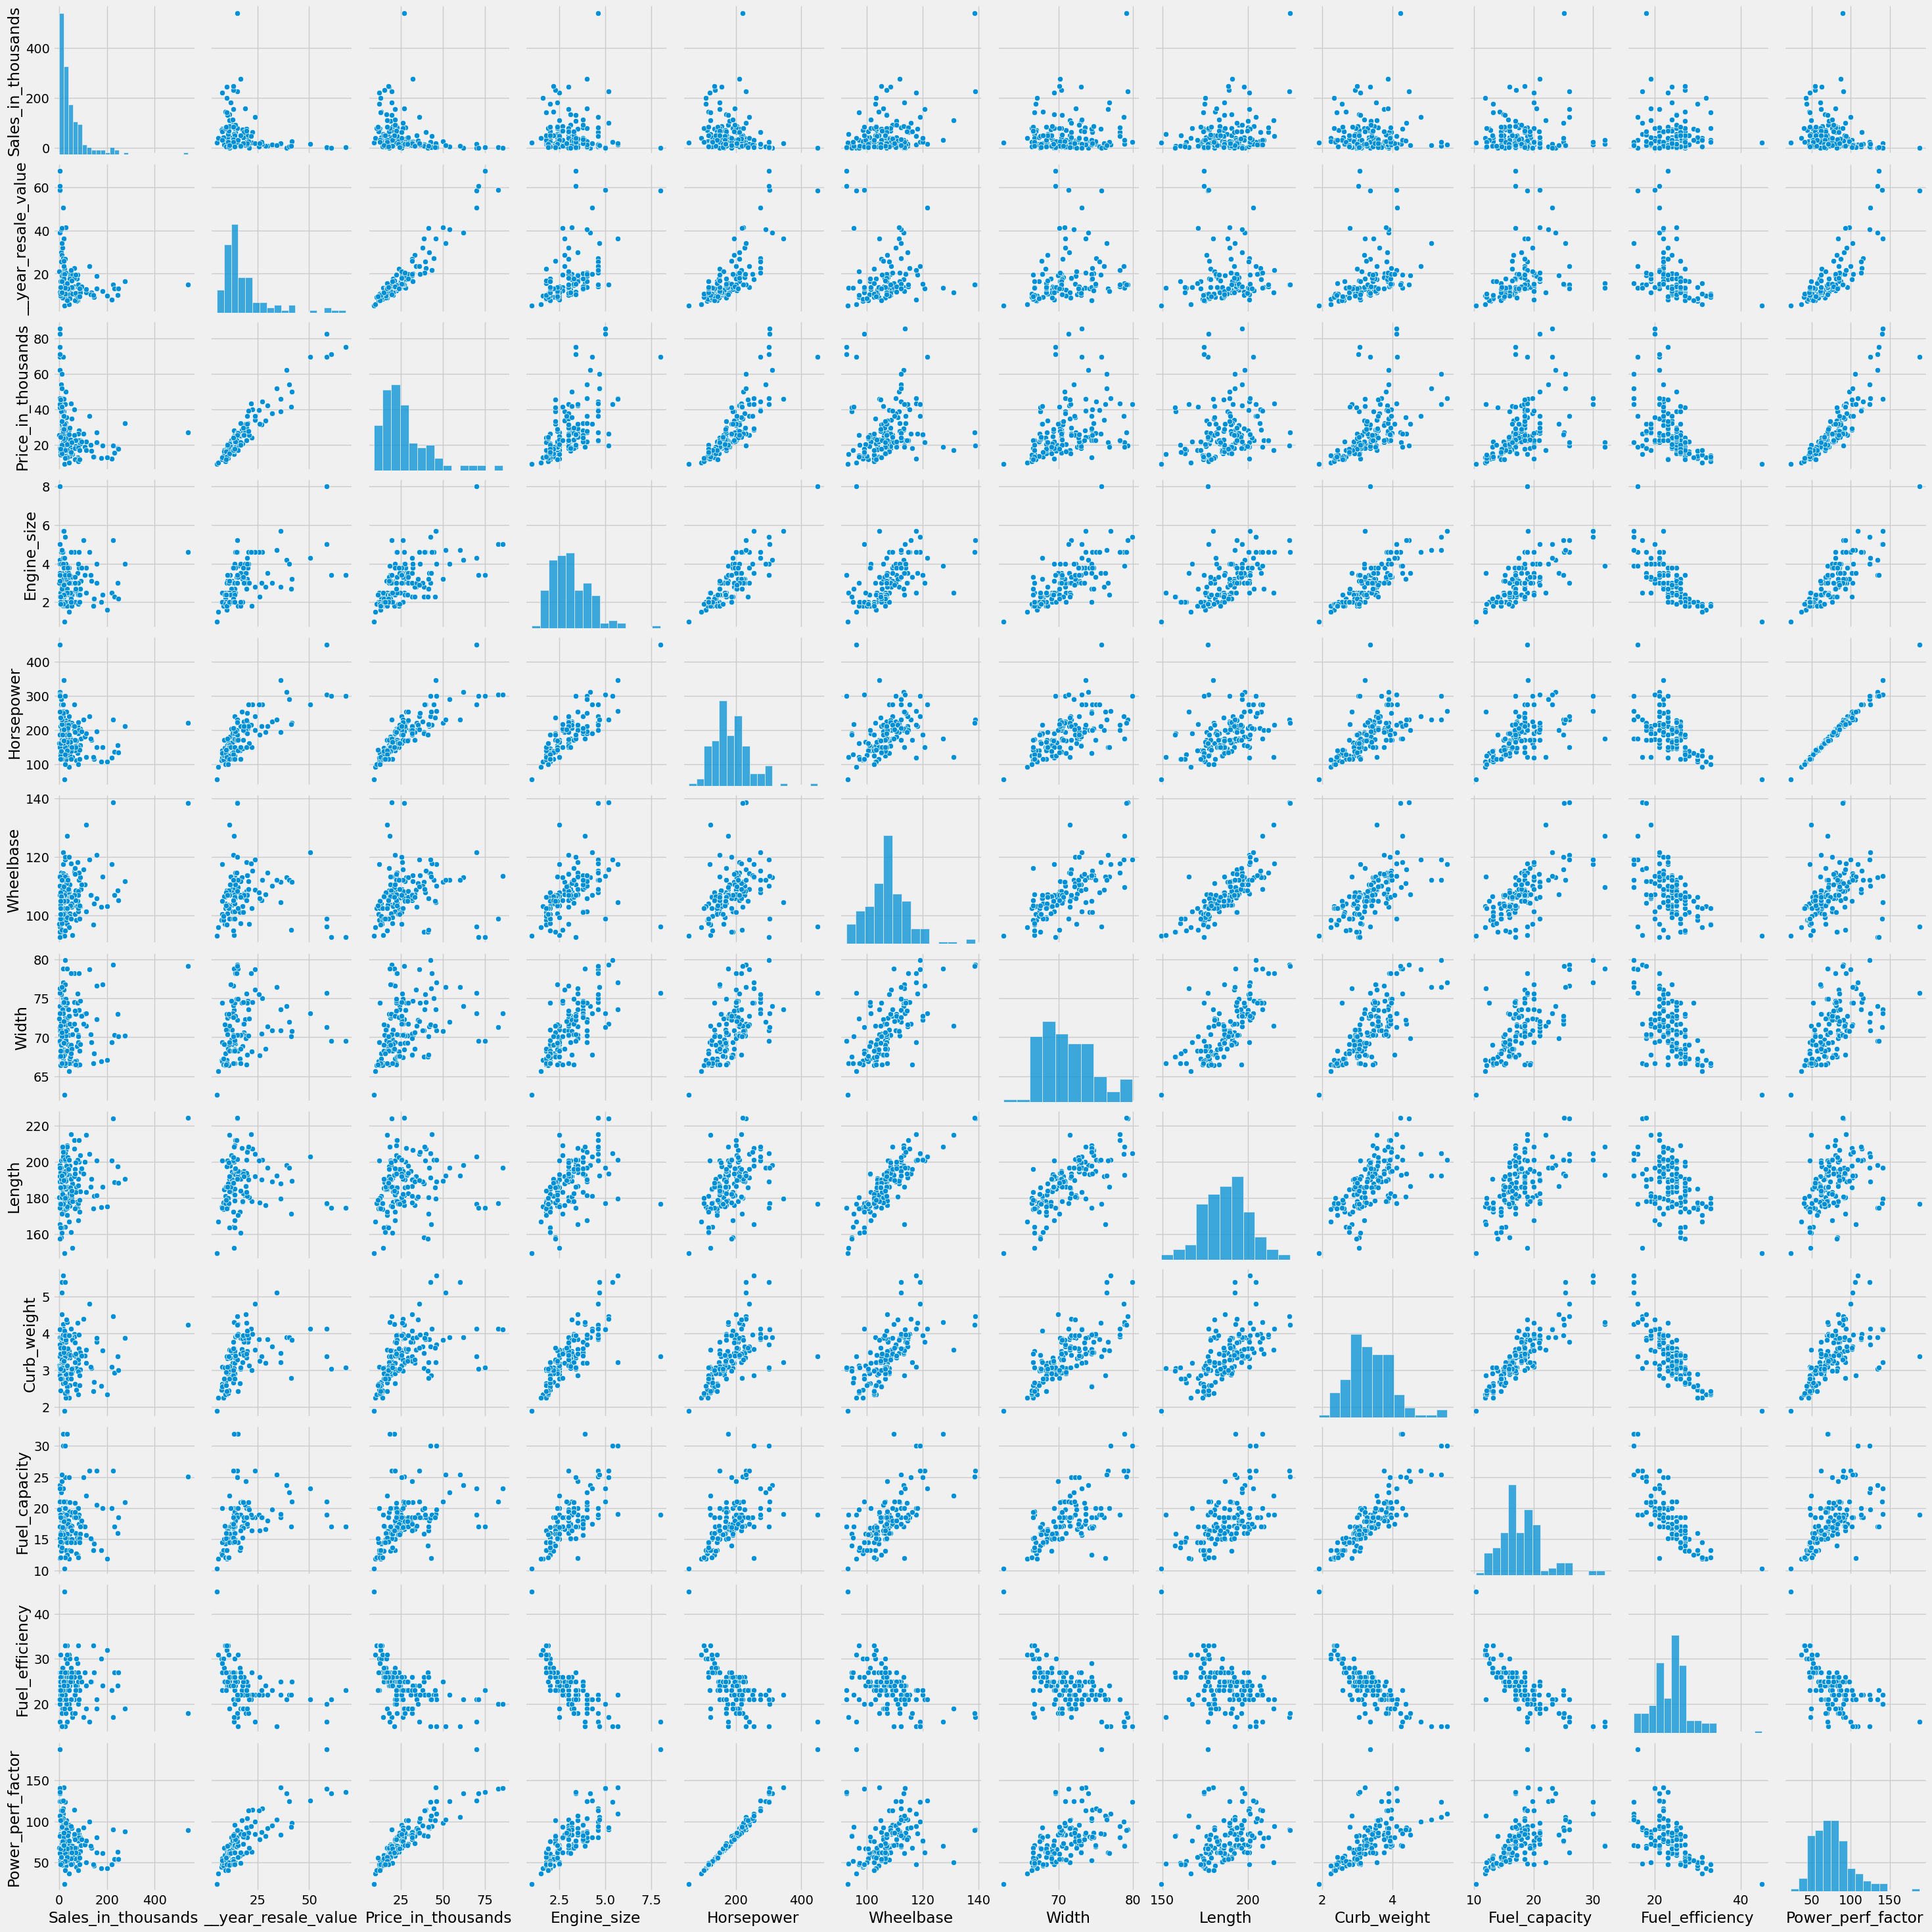

In [8]:
sns.pairplot(df)

<AxesSubplot: >

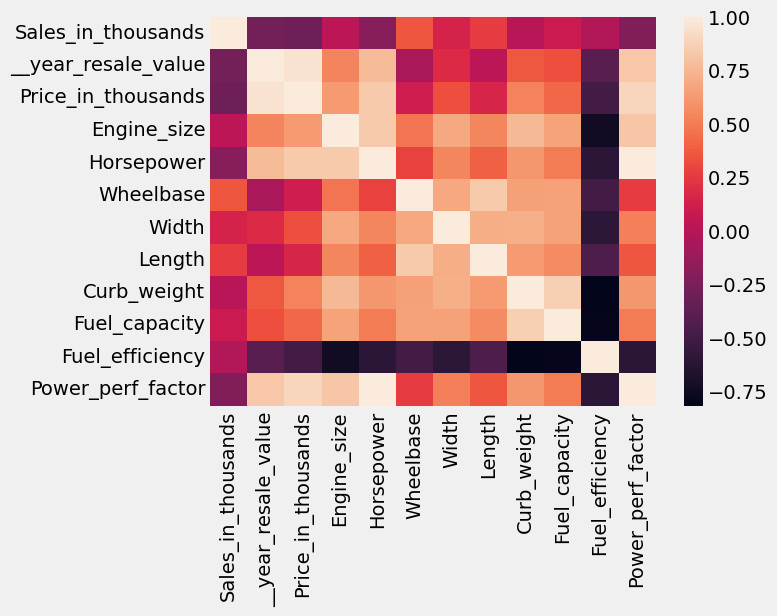

In [9]:
sns.heatmap(df.corr())

- [x] Perform exploratory analysis (EDA), use visualization, draw conclusions that may be useful in further solving the regression problem.
- [x] If necessary, perform useful data transformations (for example, transform categorical features into quantitative ones), remove unnecessary features, create new ones (Feature Engineering).

Text(0, 0.5, 'Sales in thousands')

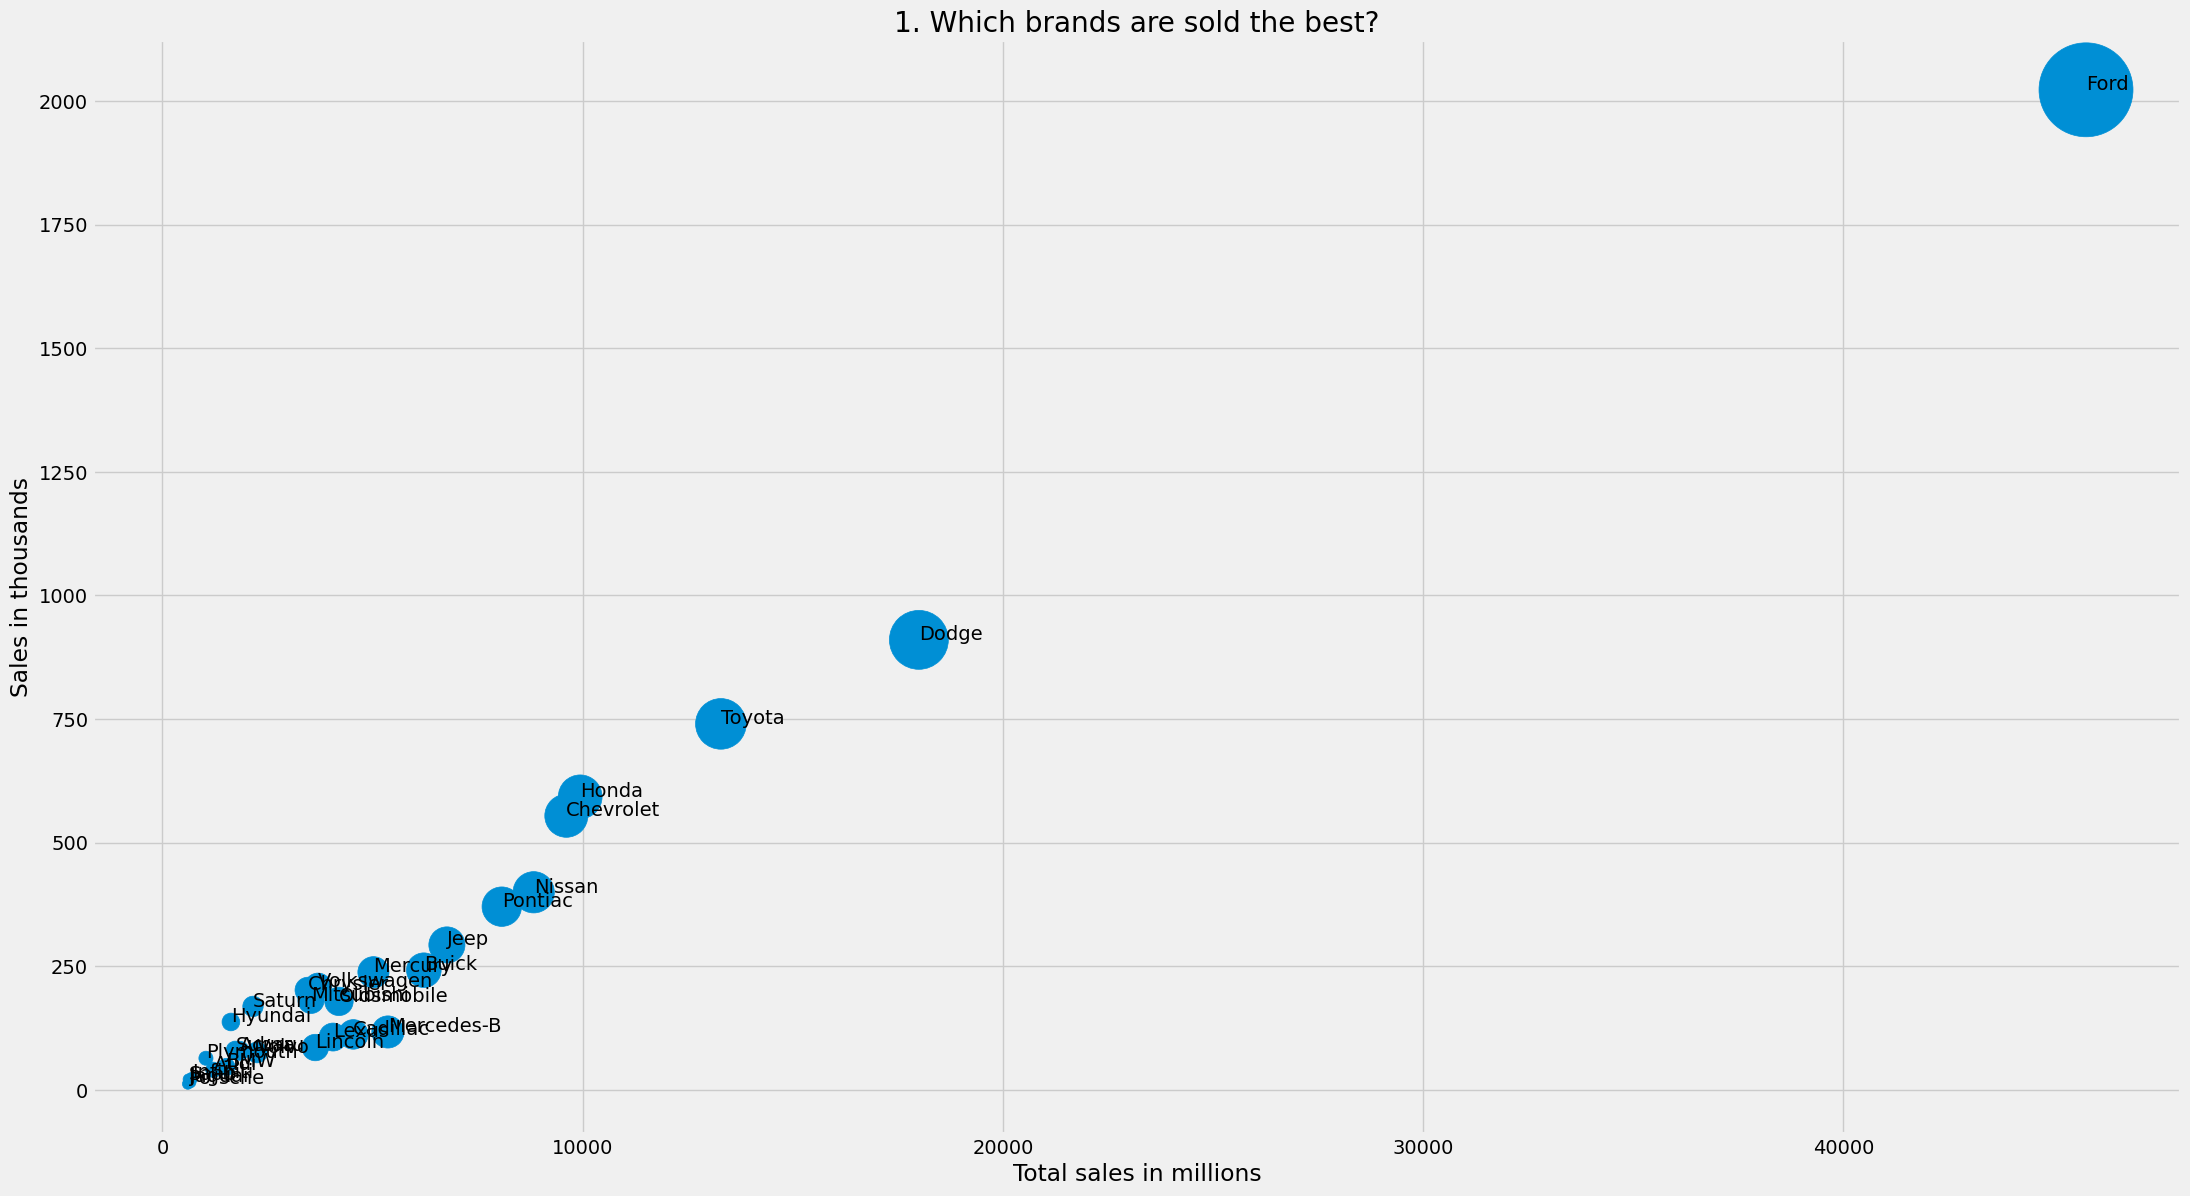

In [10]:
# 1. Which brands are sold the best?

total_sales = df['Price_in_thousands']*df['Sales_in_thousands']
df = df.assign(Total_sales_in_millions=total_sales)

df_1 = df.groupby(['Manufacturer']).sum()[['Sales_in_thousands', 'Total_sales_in_millions']]
df_1.columns = ['Sales_in_thousands', 'Total_sales_in_millions']

plt.figure(figsize=(24,13.5))
plt.scatter(df_1['Total_sales_in_millions'], df_1['Sales_in_thousands'], df_1['Total_sales_in_millions']/10)

for i, label in enumerate(df_1.index):
    plt.annotate(label, (df_1['Total_sales_in_millions'][i], df_1['Sales_in_thousands'][i]))

plt.title('1. Which brands are sold the best?')
plt.xlabel('Total sales in millions')
plt.ylabel('Sales in thousands')

Text(0, 0.5, 'Price in thousands avg')

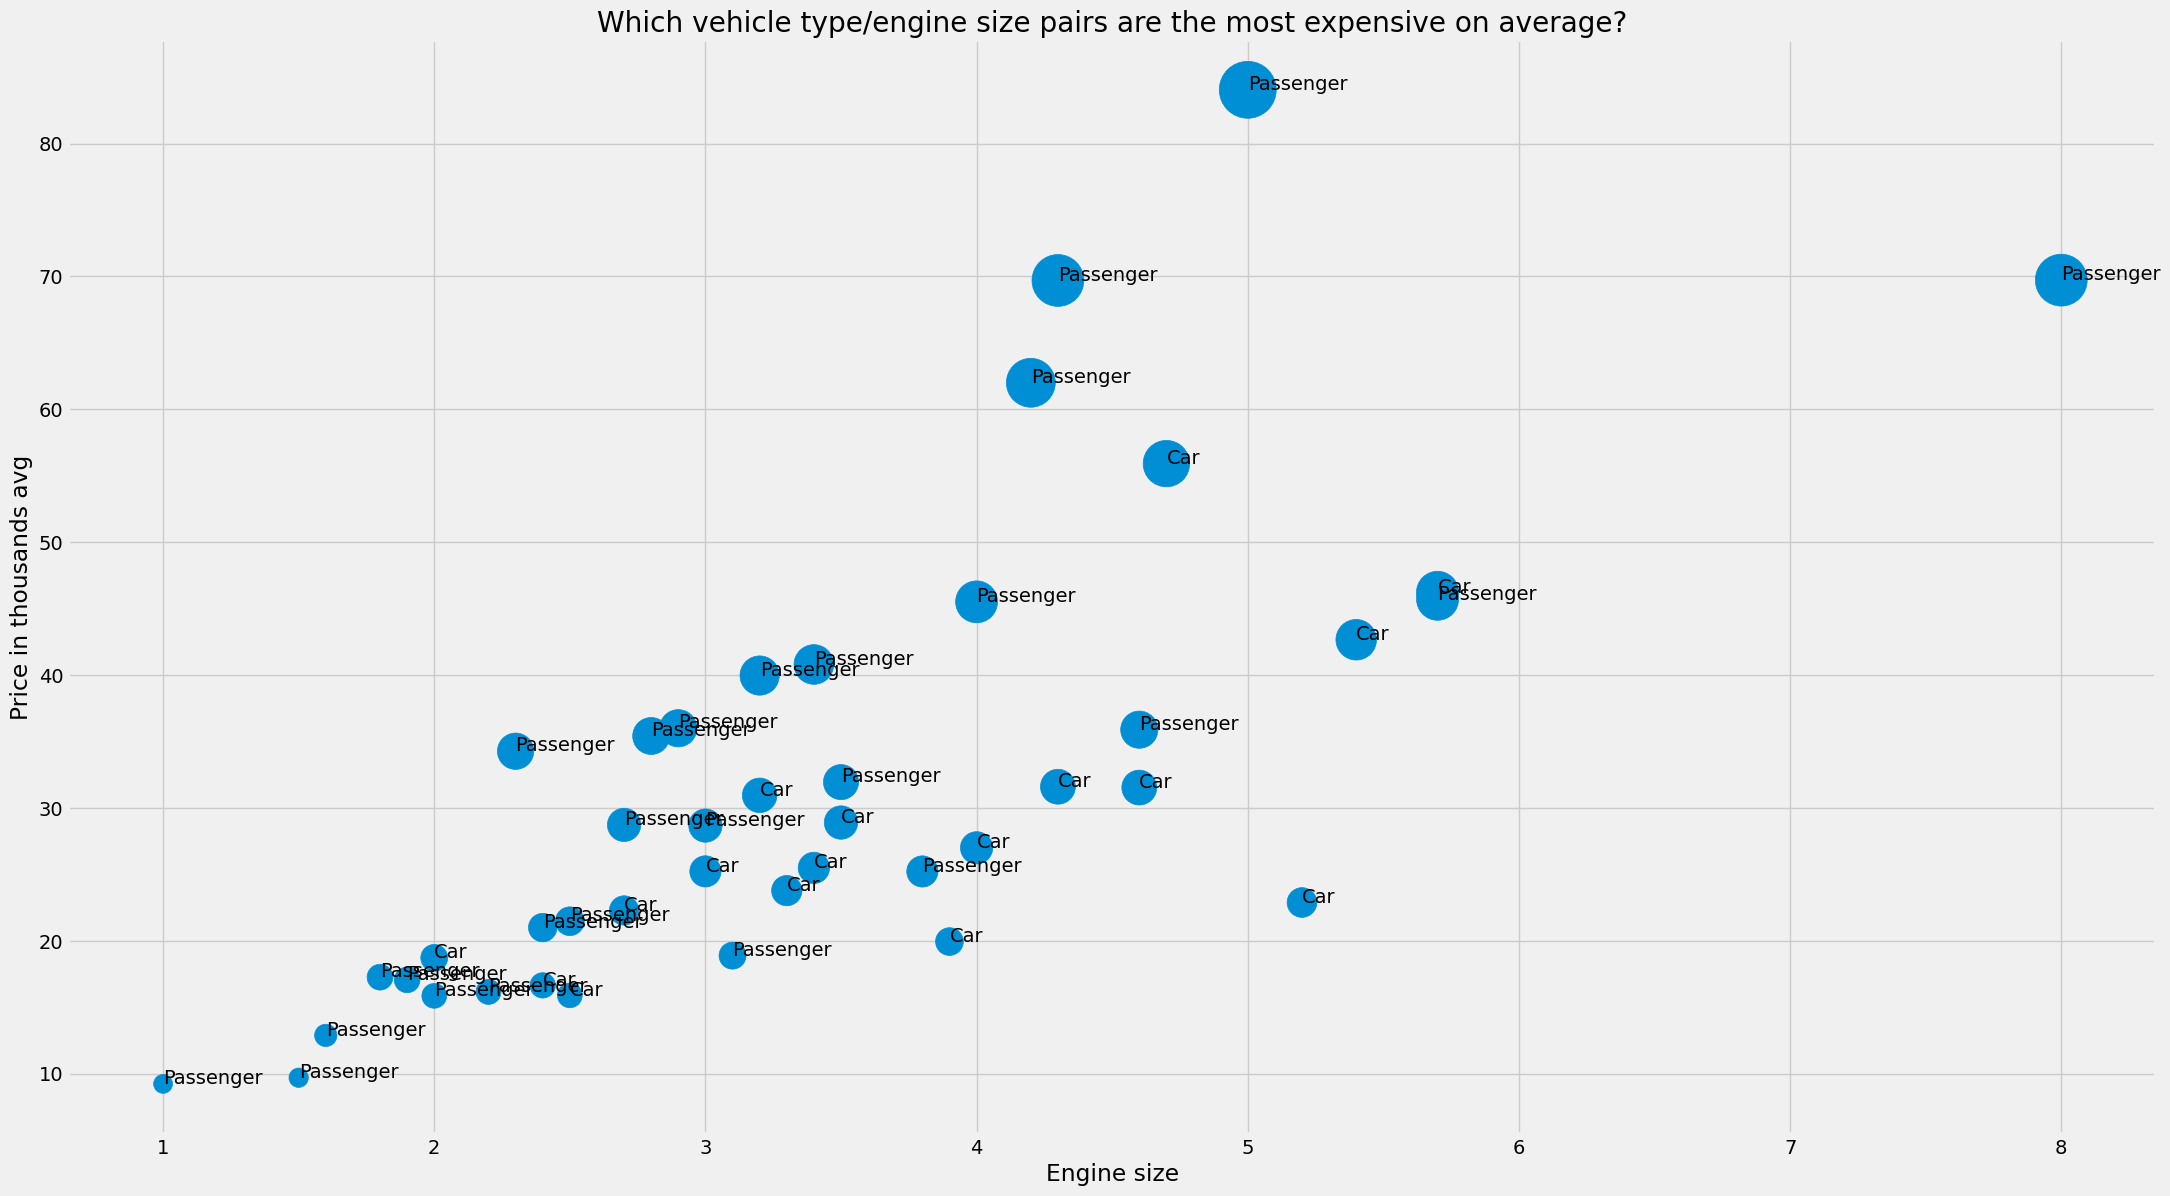

In [11]:
# Which vehicle type/engine size pairs are the most expensive on average?

df_2 = df.groupby(['Vehicle_type', 'Engine_size']).mean()[['Price_in_thousands']]
df_2.columns = ['Price_in_thousands_avg']
df_2.reset_index(inplace=True)

plt.figure(figsize=(24,13.5))
plt.scatter(df_2['Engine_size'], df_2['Price_in_thousands_avg'], df_2['Price_in_thousands_avg']*20)

for i, label in enumerate(df_2['Vehicle_type']):
    plt.annotate(label, (df_2['Engine_size'][i], df_2['Price_in_thousands_avg'][i]))

plt.title('Which vehicle type/engine size pairs are the most expensive on average?')
plt.xlabel('Engine size')
plt.ylabel('Price in thousands avg')

Text(0.5, 1.0, '3. Which cars have the least density with respect to width/length-based volume and curb weight?')

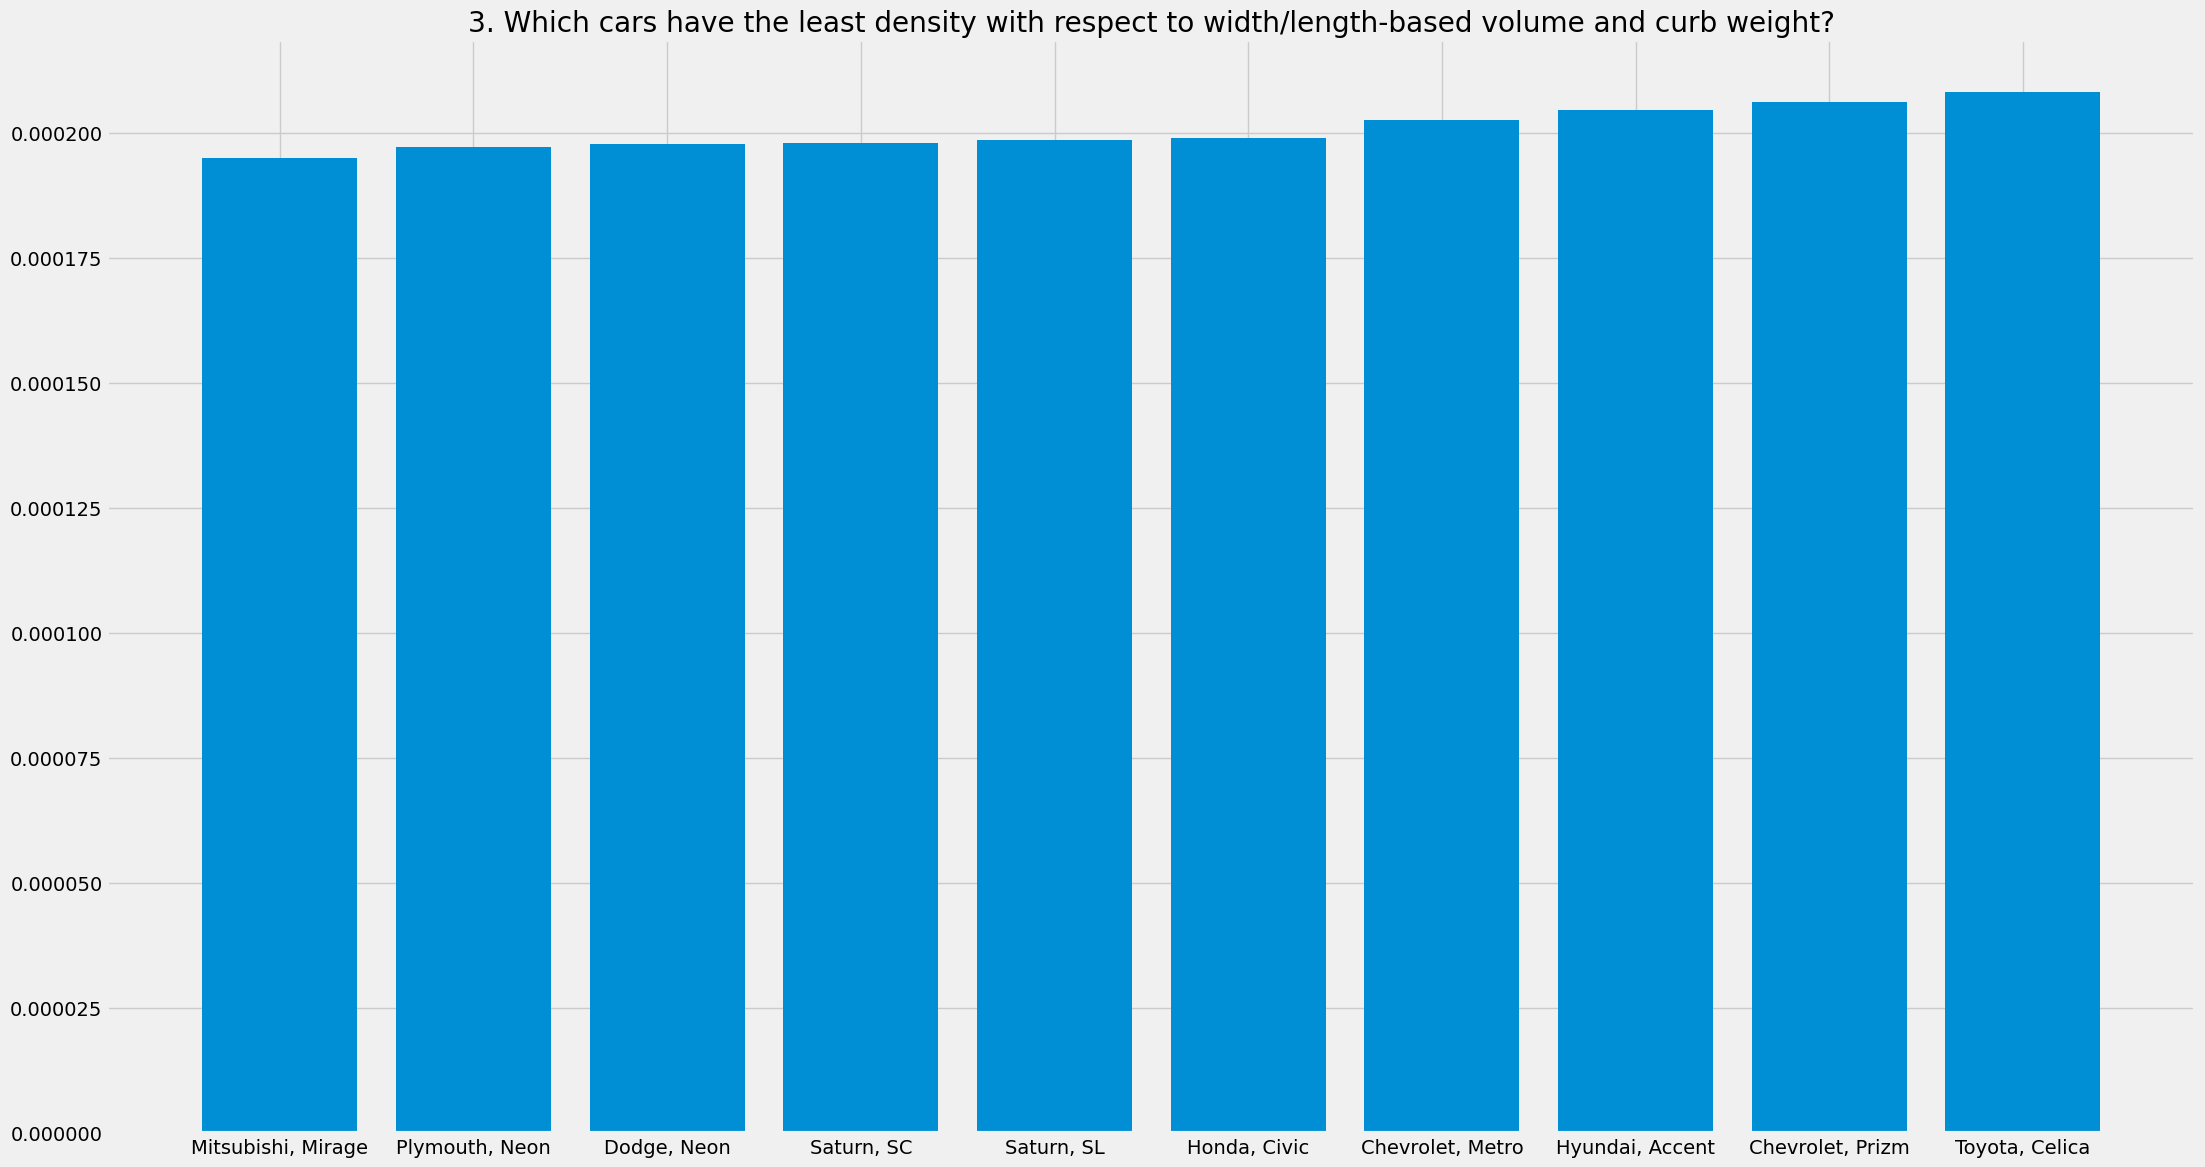

In [12]:
# 3. Which cars have the least density with respect to width/length-based volume and curb weight?

car_names = df['Manufacturer'].str.cat(df['Model'], sep=', ')
df = df.assign(Car_name=car_names)

car_density = df['Curb_weight']/(df['Width']*df['Length'])
df = df.assign(Car_density=car_density)

df_3 = df.sort_values(by='Car_density', ascending=True)

plt.figure(figsize=(24,13.5))
plt.bar(df_3['Car_name'][:10], df_3['Car_density'][:10])
plt.title('3. Which cars have the least density with respect to width/length-based volume and curb weight?')

Text(0.5, 1.0, '4. Which cars are the best in terms of fuel efficiency and the price?')

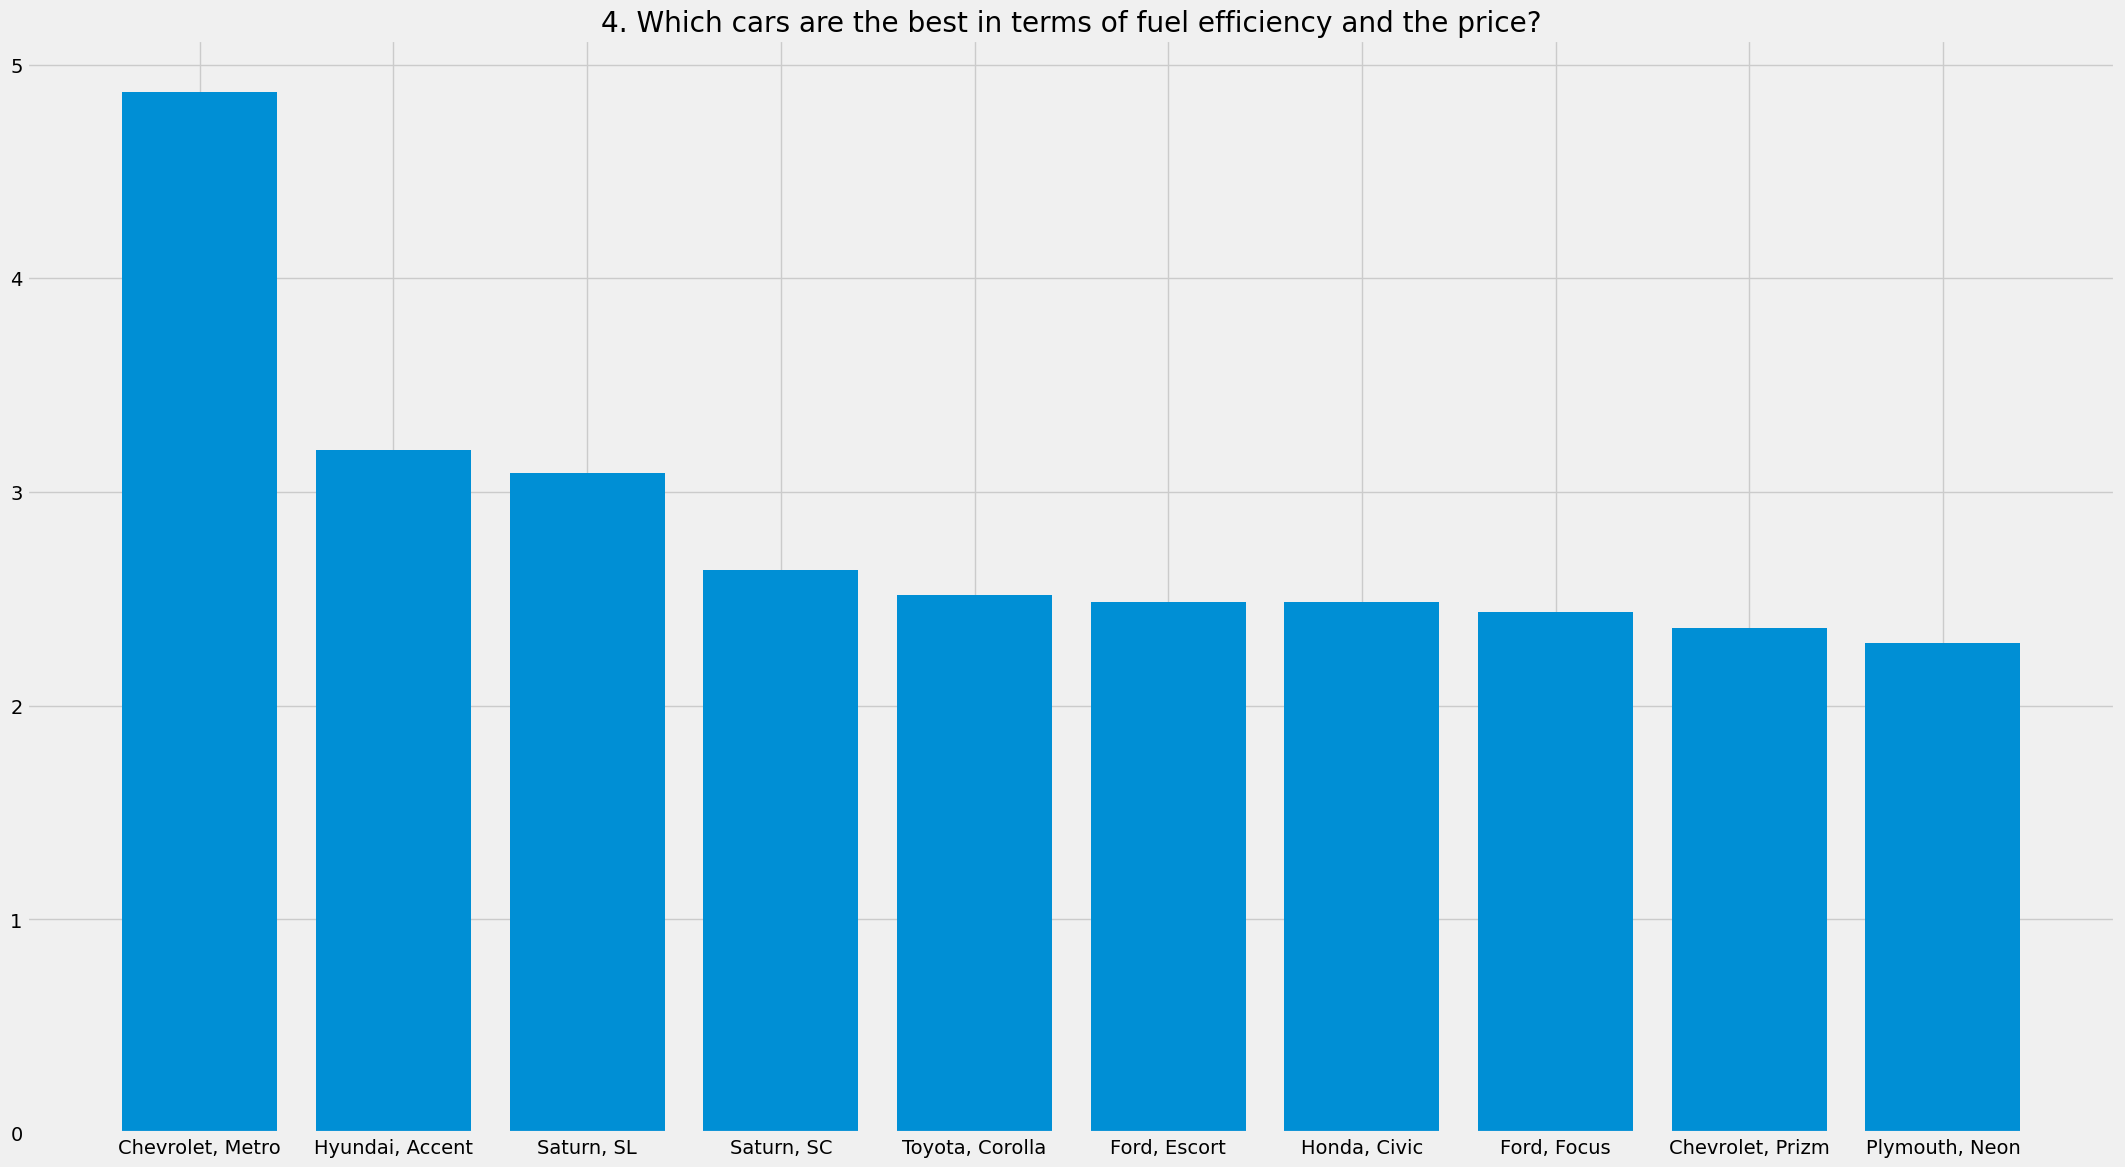

In [13]:
# 4. Which cars are the best in terms of fuel efficiency and the price?

fuel_efficiency_price = df['Fuel_efficiency']/df['Price_in_thousands']
df = df.assign(Fuel_efficiency_price=fuel_efficiency_price)

df_4 = df.sort_values(by='Fuel_efficiency_price', ascending=False)

plt.figure(figsize=(24,13.5))
plt.bar(df_4['Car_name'][:10], df_4['Fuel_efficiency_price'][:10])
plt.title('4. Which cars are the best in terms of fuel efficiency and the price?')

- [x] Use data scaling when training models.


In [14]:
s = df_2["Price_in_thousands_avg"].to_numpy()
max_s = np.max(s)
min_s = np.min(s)
scaled = (s - min_s) / (max_s - min_s)

df_2_scaled = df_2
df_2_scaled["Price_in_thousands_avg_scaled"] = scaled
df_2_scaled

,Vehicle_type,Engine_size,Price_in_thousands_avg,Price_in_thousands_avg_scaled
0,Car,2.0,18.719000,0.126766
1,Car,2.4,16.647667,0.099080
2,Car,2.5,15.896250,0.089036
3,Car,2.7,22.288000,0.174470
4,Car,3.0,25.227500,0.213761
5,Car,3.2,30.950000,0.290249
6,Car,3.3,23.779400,0.194405
7,Car,3.4,25.490000,0.217269
8,Car,3.5,28.903500,0.262895
9,Car,3.9,19.945000,0.143153


- [x] Randomly split the data into training and test sets using the methods of existing libraries.

In [15]:
df_2_train = df_2_scaled.sample(frac=0.8, random_state=25)
df_2_test = df_2.drop(df_2_train.index)

- [x] Train the model on the training set using the **gradient_descent(X, y)** function. Assess model quality on training and test sets using **MSE**, **RMSE** and $R^2$.

- [x] (+1 point) In all your implementations, add the ability to adjust the necessary hyperparameters, and in the process of training **all** models, select the optimal values ​​of these hyperparameters.

In [16]:
x_train = np.array([df_2_train["Engine_size"]]).T
y_train = np.array([df_2_train["Price_in_thousands_avg_scaled"]]).T

w_train = gradient_descent(x_train, y_train, err_tol=0.0001)
y_pred_train = np.append(np.ones((x_train.shape[0], 1)), x_train, axis=1) @ w_train


---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [0.14113342]

---Gradient descent stopped: Too little difference in error!

Iteration count: i = 76

Last error value: J = [0.03114674]

Last weights: w = [[0.01796448]
 [0.07733053]]




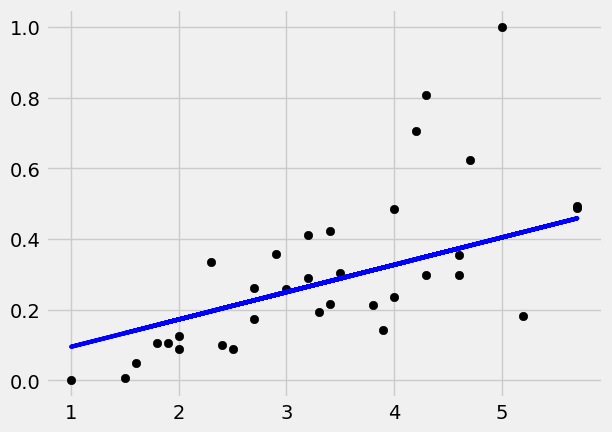

In [17]:
plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
plt.show()

In [18]:
x_test = np.array([df_2_test["Engine_size"]]).T
n_test = x_test.shape[0]
x_test = np.append(np.ones((n_test, 1)), x_test, axis=1)

y_test = np.array([df_2_test["Price_in_thousands_avg_scaled"]]).T
y_pred_test = x_test @ w_train

error_mse = np.sum(((y_pred_test - y_test) ** 2), axis=0) / n_test
error_rmse = np.sqrt(error_mse)
error_r2 = 1 - (error_mse * n_test) / np.sum(((y_pred_test - y_test.mean()) ** 2), axis=0)

print(error_mse, error_rmse, error_r2)

[0.0083449] [0.09135044] [0.56034477]


- [x] Train the model using the existing library. For example, in **sklearn** you can use **Ridge** for the $L_2$ regularizer. Compare the quality with your implementation.


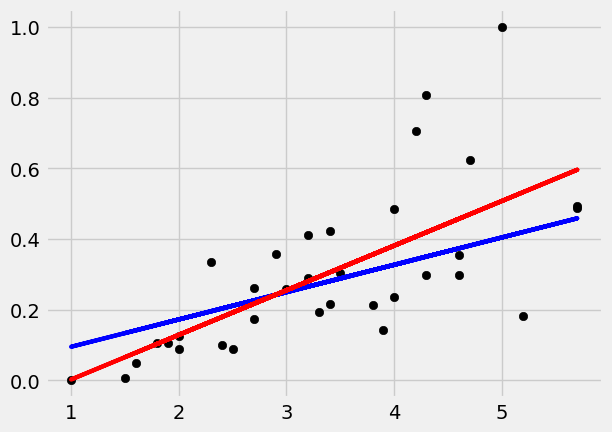

In [19]:
regr = Ridge(alpha=0.001, max_iter=1500, tol=0.01)
regr.fit(x_train, y_train)
y_pred_lib = regr.predict(x_train)

plt.scatter(x_train, y_train,  color='black')
plt.plot(x_train, y_pred_train, color='blue', linewidth=3)
plt.plot(x_train, y_pred_lib, color='red', linewidth=3)
plt.show()

In [20]:
x_test_lib = np.array([df_2_test["Engine_size"]]).T
y_pred_test_lib = regr.predict(x_test_lib)

error_mse_lib = np.sum(((y_pred_test_lib - y_test) ** 2), axis=0) / n_test
error_rmse_lib = np.sqrt(error_mse_lib)
error_r2_lib = 1 - (error_mse_lib * n_test) / np.sum(((y_pred_test_lib - y_test.mean()) ** 2), axis=0)

print(error_mse_lib, error_rmse_lib, error_r2_lib)

[0.0068998] [0.08306501] [0.8686941]


## Code added on 24.12.2022

- [x] Repeat the same, but using cross-validation.
- [x] Create a table, with rows (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) and columns (Fold1, Fold2, ..., Foldk, E, STD) , where k --- number of folds in cross-validation, E --- mat. expectation and STD --- standard deviation. To conclude.

In [21]:
le = LabelEncoder()
vehicle_types = le.fit_transform(df["Vehicle_type"])
df["Vehicle_type_cat"] = vehicle_types
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,...,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Total_sales_in_millions,Car_name,Car_density,Fuel_efficiency_price,Vehicle_type_cat
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,...,2.639,13.2,28.0,2/2/2012,58.280150,363.75850,"Acura, Integra",0.000227,1.302326,1
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,...,3.517,17.2,25.0,6/3/2011,91.370778,1118.50560,"Acura, TL",0.000259,0.880282,1
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,...,3.470,17.2,26.0,1/4/2012,NaN,NaN,"Acura, CL",0.000256,NaN,1
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,...,3.850,18.0,22.0,3/10/2011,91.389779,360.69600,"Acura, RL",0.000274,0.523810,1
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,...,2.998,16.4,27.0,10/8/2011,62.777639,489.32403,"Audi, A4",0.000247,1.125469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,...,3.042,15.8,25.0,9/21/2011,66.498812,86.49800,"Volvo, V40",0.000255,1.024590,1
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,...,3.208,17.9,25.0,11/24/2012,70.654495,419.23750,"Volvo, S70",0.000249,0.909091,1
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,...,3.259,17.9,25.0,6/25/2011,71.155978,504.89280,"Volvo, V70",0.000253,0.868056,1
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,...,3.601,18.5,23.0,4/26/2011,101.623357,158.93150,"Volvo, C70",0.000271,0.505495,1


In [22]:
df_num = df[df.select_dtypes(include=np.number).columns.tolist()]
df_num = df_num.dropna(axis=0)
df_num

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Total_sales_in_millions,Car_density,Fuel_efficiency_price,Vehicle_type_cat
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,363.75850,0.000227,1.302326,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1118.50560,0.000259,0.880282,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,360.69600,0.000274,0.523810,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,489.32403,0.000247,1.125469,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,637.58100,0.000244,0.648012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,145.43890,0.000248,1.744966,1
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,1398.14070,0.000242,1.556886,1
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,1083.36240,0.000241,1.273585,1
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,191.28431,0.000288,1.300650,1


In [23]:
s = df_num["Price_in_thousands"].to_numpy()
max_s = np.max(s)
min_s = np.min(s)
scaled = (s - min_s) / (max_s - min_s)

df_num_scaled = df_num
df_num_scaled["Price_in_thousands_scaled"] = scaled
df_num_scaled = df_num_scaled.drop(["Price_in_thousands"], axis=1)
df_num_scaled

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Total_sales_in_millions,Car_density,Fuel_efficiency_price,Vehicle_type_cat,Price_in_thousands_scaled
0,16.919,16.360,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,363.75850,0.000227,1.302326,1,0.167178
1,39.384,19.875,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1118.50560,0.000259,0.880282,1,0.261228
3,8.588,29.725,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,360.69600,0.000274,0.523810,1,0.446603
4,20.397,22.255,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,489.32403,0.000247,1.125469,1,0.201118
5,18.780,23.555,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,637.58100,0.000244,0.648012,1,0.336877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,145.43890,0.000248,1.744966,1,0.077217
146,83.721,13.240,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,1398.14070,0.000242,1.556886,1,0.101752
147,51.102,16.725,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,1083.36240,0.000241,1.273585,1,0.163089
148,9.569,16.575,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,191.28431,0.000288,1.300650,1,0.146596


In [24]:
def get_mse(y_pred, y):
    return np.sum(((y_pred - y) ** 2), axis=0) / y.shape[0]

def get_rmse(y_pred, y):
    return np.sqrt(np.sum(((y_pred - y) ** 2), axis=0) / y.shape[0])

def get_r2(y_pred, y):
    return 1 - (np.sum(((y_pred - y) ** 2), axis=0)) / np.sum(((y_pred - y.mean()) ** 2), axis=0)

In [25]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

comp_data = {}

def training(train, test, fold):
    print("Training for fold no. {0} has started...".format(fold))
    comp_col = {}
    
    x_train = np.array([train["Price_in_thousands_scaled"]]).T
    y_train = np.array([train["Vehicle_type_cat"]]).T
    x_test = np.array([test["Price_in_thousands_scaled"]]).T
    y_test = np.array([test["Vehicle_type_cat"]]).T
    
    w_train = gradient_descent(x_train, y_train, err_tol=0.0001)
    y_pred_train = np.append(np.ones((x_train.shape[0], 1)), x_train, axis=1) @ w_train
    w_test = gradient_descent(x_test, y_test, err_tol=0.0001)
    y_pred_test = np.append(np.ones((x_test.shape[0], 1)), x_test, axis=1) @ w_test
    
    comp_col["mse-train"] = get_mse(y_pred_train, y_train)[0]
    comp_col["mse-test"] = get_mse(y_pred_test, y_test)[0]
    comp_col["rmse-train"] = get_rmse(y_pred_train, y_train)[0]
    comp_col["rmse-test"] = get_rmse(y_pred_test, y_test)[0]
    comp_col["r2-train"] = get_r2(y_pred_train, y_train)[0]
    comp_col["r2-test"] = get_r2(y_pred_test, y_test)[0]
    
    comp_data[str(fold)] = comp_col
    
fold = 1
x = df_num_scaled.drop(["Vehicle_type_cat"], axis=1)
y = df_num_scaled["Vehicle_type_cat"]

for train_index, test_index in cv.split(x, y):
    train = df_num_scaled.iloc[train_index,:]
    test = df_num_scaled.iloc[test_index,:]
    training(train, test, fold)
    fold += 1

Training for fold no. 1 has started...

---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [0.75238095]

---Gradient descent stopped: Too little difference in error!

Iteration count: i = 753

Last error value: J = [0.20961369]

Last weights: w = [[0.56865853]
 [0.13060626]]



---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [0.75]

---Gradient descent stopped: Too little difference in error!

Iteration count: i = 756

Last error value: J = [0.20154245]

Last weights: w = [[0.56240858]
 [0.1678385 ]]


Training for fold no. 2 has started...

---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [0.75238095]

---Gradient descent stopped: Too little difference in error!

Iteration count: i = 751

Last error value: J = [0.20758809]

Last weights: w = [[0.56531803]
 [0.14446306]]



---Gradient descent started

First weights: w = [[0.]
 [0.]]

First error value: J = [0.75]

---Gradient des

In [26]:
df_comp = pd.DataFrame.from_dict(comp_data)
df_comp

,1,2,3,4,5,6,7,8,9,10
mse-train,0.209614,0.207588,0.208543,0.209344,0.210228,0.209637,0.208568,0.211212,0.206528,0.207819
mse-test,0.201542,0.214277,0.212149,0.203882,0.190440,0.200622,0.212005,0.177395,0.225627,0.217526
rmse-train,0.457836,0.455618,0.456665,0.457541,0.458507,0.457861,0.456693,0.459578,0.454454,0.455872
rmse-test,0.448935,0.462900,0.460596,0.451533,0.436394,0.447909,0.460439,0.421183,0.475002,0.466397
r2-train,-7.601915,-7.623585,-7.602107,-7.613697,-7.624682,-7.617382,-7.638427,-7.803525,-7.558145,-7.575461
r2-test,-7.817855,-7.602625,-7.740564,-7.929833,-7.167359,-7.609789,-7.584348,-6.083519,-8.067669,-8.161372


In [27]:
df_comp["STD"] = df_comp.std(axis=1)
df_comp["E"] = df_comp.drop("STD", axis=1).mean(axis=1)
df_comp

,1,2,3,4,5,6,7,8,9,10,STD,E
mse-train,0.209614,0.207588,0.208543,0.209344,0.210228,0.209637,0.208568,0.211212,0.206528,0.207819,0.001379,0.208908
mse-test,0.201542,0.214277,0.212149,0.203882,0.190440,0.200622,0.212005,0.177395,0.225627,0.217526,0.014032,0.205547
rmse-train,0.457836,0.455618,0.456665,0.457541,0.458507,0.457861,0.456693,0.459578,0.454454,0.455872,0.001508,0.457063
rmse-test,0.448935,0.462900,0.460596,0.451533,0.436394,0.447909,0.460439,0.421183,0.475002,0.466397,0.015660,0.453129
r2-train,-7.601915,-7.623585,-7.602107,-7.613697,-7.624682,-7.617382,-7.638427,-7.803525,-7.558145,-7.575461,0.066843,-7.625893
r2-test,-7.817855,-7.602625,-7.740564,-7.929833,-7.167359,-7.609789,-7.584348,-6.083519,-8.067669,-8.161372,0.595500,-7.576493


In [28]:
x = df_num_scaled.drop(["Vehicle_type_cat"], axis=1)
y = df_num_scaled["Vehicle_type_cat"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

params = {"alpha":[1, 10]}
gs_ridge = GridSearchCV(Ridge(), params, scoring="neg_mean_squared_error", cv=cv)

gs_ridge.fit(x_train, y_train)
y_pred_train_lib = gs_ridge.predict(x_train)
get_mse(y_pred_train_lib, y_train)

0.0460029258446566